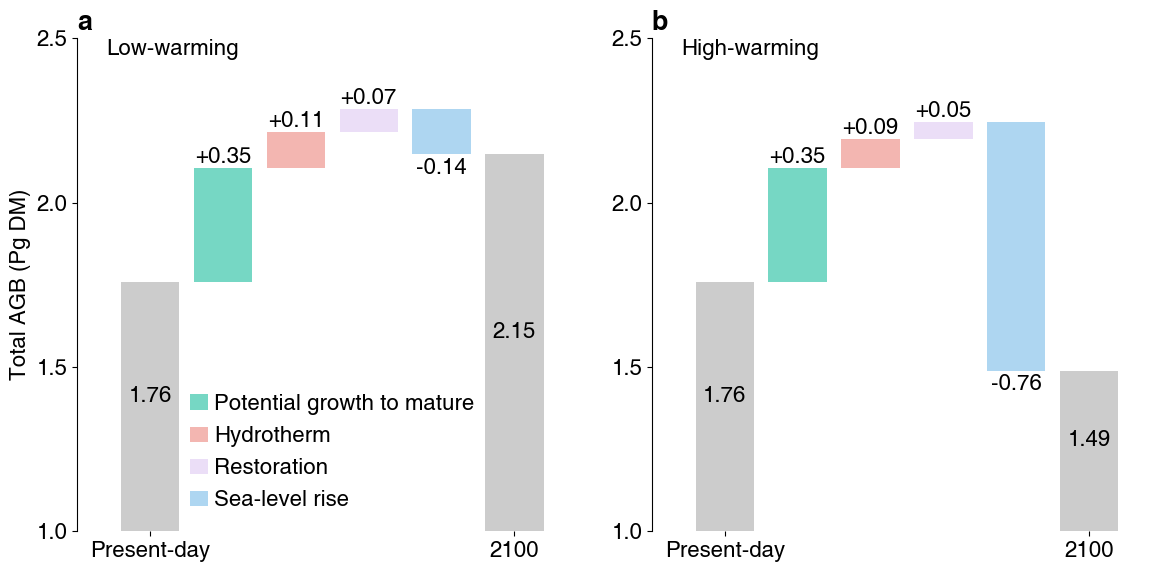

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

# 加载数据
with open('../data/DIVA_data/Coast_with_Mang.pkl', 'rb') as f:
    data = pickle.load(f)

# 选择Pop5和恢复策略50%
area_after_SLR_126_1 = data['area_after_SLR_126'][:, 1]
area_after_SLR_585_1 = data['area_after_SLR_585'][:, 1]
area_restoration_126_1 = data['area_restoration_126'][:, 0]
area_restoration_585_1 = data['area_restoration_585'][:, 0]

# 提取agb和area数据
agb_present = data['agb_present']
agb_grow = data['agb_grow']
agb_126 = data['agb_126']
agb_585 = data['agb_585']
area = data['area']

# 计算各类总AGB
total_agb_present = np.nansum(agb_present * area) / (10 ** 9)
total_agb_grow = np.nansum(agb_grow * area) / (10 ** 9)
total_agb_126 = np.nansum(agb_126 * area) / (10 ** 9)
total_agb_585 = np.nansum(agb_585 * area) / (10 ** 9)

total_agb_126_restoration = np.nansum(agb_126 * (area + area_restoration_126_1)) / (10 ** 9)
total_agb_585_restoration = np.nansum(agb_585 * (area + area_restoration_585_1)) / (10 ** 9)
total_agb_126_restoration_SLR = np.nansum(agb_126 * (area_after_SLR_126_1 + area_restoration_126_1)) / (10 ** 9)
total_agb_585_restoration_SLR = np.nansum(agb_585 * (area_after_SLR_585_1 + area_restoration_585_1)) / (10 ** 9)

# Set global font to Helvetica
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['font.size'] = 16
# Set the mathtext font to Helvetica
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica:bold'


# 绘制图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# 第一张图：低温化情境
xtips = np.arange(1, 7)
ytips = [(total_agb_present + 1) / 2, total_agb_grow, total_agb_126, total_agb_126_restoration, total_agb_126_restoration_SLR, (total_agb_126_restoration_SLR + 1) / 2]
labels = [f"{total_agb_present:.2f}",
          f"{total_agb_grow - total_agb_present:+.2f}",
          f"{total_agb_126 - total_agb_grow:+.2f}",
          f"{total_agb_126_restoration - total_agb_126:+.2f}",
          f"{total_agb_126_restoration_SLR-total_agb_126_restoration:+.2f}",
          f"{total_agb_126_restoration_SLR:.2f}"]

bars = [
    ax1.bar(1, total_agb_present, color=(204 / 255, 204 / 255, 204 / 255), edgecolor='none'),
    ax1.bar(2, total_agb_grow, color=(118 / 255, 215 / 255, 196 / 255), edgecolor='none', label='Potential growth to mature'),
    ax1.bar(2, total_agb_present, color='w', edgecolor='w'),
    ax1.bar(3, total_agb_126, color=(243 / 255, 182 / 255, 177 / 255), edgecolor='none', label='Hydrotherm'),
    ax1.bar(3, total_agb_grow, color='w', edgecolor='w'),
    ax1.bar(4, total_agb_126_restoration, color=(235 / 255, 222 / 255, 247 / 255), edgecolor='none', label='Restoration'),
    ax1.bar(4, total_agb_126, color='w', edgecolor='w'),
    ax1.bar(5, total_agb_126_restoration, color=(174 / 255, 214 / 255, 241 / 255), edgecolor='none', label='Sea-level rise'),
    ax1.bar(5, total_agb_126_restoration_SLR, color='w', edgecolor='none'),
    ax1.bar(6, total_agb_126_restoration_SLR, color=(204 / 255, 204 / 255, 204 / 255), edgecolor='none')
]

# 设置每个矩形对象的边框颜色
for bar in bars:
    for rect in bar.get_children():
        rect.set_edgecolor('none')

# 添加文本标签
for i, (xtip, ytip, label) in enumerate(zip(xtips, ytips, labels)):
    label_value = float(label)
    if label_value > 0:
        ax1.text(xtip, ytip, label, ha='center', va='bottom')
    else:
        ax1.text(xtip, ytip - 0.01, label, ha='center', va='top')

# 第二张图：高温化情境
xtips = np.arange(1, 7)
ytips = [(total_agb_present + 1) / 2, total_agb_grow, total_agb_585, total_agb_585_restoration, total_agb_585_restoration_SLR, (total_agb_585_restoration_SLR + 1) / 2]
labels = [f"{total_agb_present:.2f}",
          f"{total_agb_grow - total_agb_present:+.2f}",
          f"{total_agb_585 - total_agb_grow:+.2f}",
          f"{total_agb_585_restoration - total_agb_585:+.2f}",
          f"{total_agb_585_restoration_SLR-total_agb_585_restoration:+.2f}",
          f"{total_agb_585_restoration_SLR:.2f}"]

bars = [
    ax2.bar(1, total_agb_present, color=(204 / 255, 204 / 255, 204 / 255), edgecolor='none'),
    ax2.bar(2, total_agb_grow, color=(118 / 255, 215 / 255, 196 / 255), edgecolor='none', label='Growth'),
    ax2.bar(2, total_agb_present, color='w', edgecolor='w'),
    ax2.bar(3, total_agb_585, color=(243 / 255, 182 / 255, 177 / 255), edgecolor='none', label='Hydrotherm'),
    ax2.bar(3, total_agb_grow, color='w', edgecolor='w'),
    ax2.bar(4, total_agb_585_restoration, color=(235 / 255, 222 / 255, 247 / 255), edgecolor='none', label='Restoration'),
    ax2.bar(4, total_agb_585, color='w', edgecolor='w'),
    ax2.bar(5, total_agb_585_restoration, color=(174 / 255, 214 / 255, 241 / 255), edgecolor='none', label='Sea-level rise'),
    ax2.bar(5, total_agb_585_restoration_SLR, color='w', edgecolor='none'),
    ax2.bar(6, total_agb_585_restoration_SLR, color=(204 / 255, 204 / 255, 204 / 255), edgecolor='none')
]

# 设置每个矩形对象的边框颜色
for bar in bars:
    for rect in bar.get_children():
        rect.set_edgecolor('none')

# 添加文本标签
for i, (xtip, ytip, label) in enumerate(zip(xtips, ytips, labels)):
    label_value = float(label)
    if label_value > 0:
        ax2.text(xtip, ytip, label, ha='center', va='bottom')
    else:
        ax2.text(xtip, ytip - 0.01, label, ha='center', va='top')

# 设置图形属性
for ax in [ax1, ax2]:
    ax.set_xlim([0, 7])
    ax.set_ylim([1.0, 2.5])
    ax.set_yticks(np.arange(1.0, 2.6, 0.5))
    ax.set_xticks([1, 6])
    ax.set_xticklabels(['Present-day', '2100'])
    # ax.set_ylabel('Total AGB (Pg DM)')
    ax.tick_params(axis='both')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

ax1.set_ylabel('Total AGB (Pg DM)')

# 添加图例
ax1.text(0.4, 2.45, 'Low-warming')
ax1.set_title('a', loc='left', fontweight='bold')
ax2.text(0.4, 2.45, 'High-warming')
ax2.set_title('b', loc='left', fontweight='bold')

# 获取所有图例句柄和标签
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, labels, loc='lower center', frameon=False, handlelength=0.8, fontsize=16, handletextpad=0.3)

# 保存图像
plt.tight_layout()
plt.savefig('../fig/py02_future_change.jpg', dpi=400)
plt.show()
